# Assignment 2: K-Nearest-Neighbors with K-Fold Crossvalidation

By typing my name, I confirm that the code, experiments, results, and discussions are all written by me, except for the code provided by the instructor.  

*Ryan Blocker*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#60-points:-Code-Requirements" data-toc-modified-id="60-points:-Code-Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="red"><strong>60 points</strong></font>: Code Requirements</a></span><ul class="toc-item"><li><span><a href="#Function-knn" data-toc-modified-id="Function-knn-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function <code>knn</code></a></span></li><li><span><a href="#Function-confusion_matrix" data-toc-modified-id="Function-confusion_matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Function <code>confusion_matrix</code></a></span></li></ul></li><li><span><a href="#30-points:-Experiments-with-Frogs-and-Toads!" data-toc-modified-id="30-points:-Experiments-with-Frogs-and-Toads!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font color="red"><strong>30 points</strong></font>: Experiments with Frogs and Toads!</a></span><ul class="toc-item"><li><span><a href="#Read-the-frog-data" data-toc-modified-id="Read-the-frog-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read the frog data</a></span></li><li><span><a href="#Apply-knn-and-confusion_matrix-to-frog-data" data-toc-modified-id="Apply-knn-and-confusion_matrix-to-frog-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Apply <code>knn</code> and <code>confusion_matrix</code> to frog data</a></span></li><li><span><a href="#Download,-unzip,-and-import-k_fold_partitions." data-toc-modified-id="Download,-unzip,-and-import-k_fold_partitions.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Download, unzip, and import <code>k_fold_partitions</code>.</a></span></li></ul></li><li><span><a href="#10-points:-Discussion-Requirements" data-toc-modified-id="10-points:-Discussion-Requirements-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><font color="red"><strong>10 points</strong></font>: Discussion Requirements</a></span></li></ul></div>

## Summary

You will define `knn` and `confusion_matrix` functions and apply them to some interesting data about frogs and toads ([in the family Anuran](https://en.wikipedia.org/wiki/List_of_Anuran_families)). Then you will investigate how the classification accuracy of `knn` on test data varies with $k$ the number of nearest neighbors.

##  <font color="red">**60 points**</font>: Code Requirements

### Function `knn`

Define function `knn` with these arguments:
* `Xtrain`: `np.array` of shape $N_{train} \times D$, where $N_{train}$ is the number of train samples and $D$ is the dimension (number of components) of each sample,
* `Ttrain`: `np.array` of shape $N_{train} \times 1$ of integer values,  indicating the true classes for each training sample,
* `Xtest`: `np.array` of shape $N_{test} \times D$, where $N_{test}$ is the number of testing samples and $D$ is the dimension (number of components) of each sample,
* `k`: integer, number of nearest neighbors

and that returns:

* `Ytest`: `np.array` of shape $N_{test} \times 1$ of integer values, indicating the predicted class for each test sample.

Function `knn` must first standardize `Xtrain` and `Xtest` by calling the `standardize` function given in lecture.  Your `knn` function must also call the `most_common_in_row` function given in lecture.

### Function `confusion_matrix`

Define function `confusion_matrix` with these arguments:

* `T`: `np.array` of shape $N \times 1$ of integer values, indicating the true classes for $N$ samples,
* `Y`: `np.array` of shape $N \times 1$ of integer values, indicating the predicted classes for $N$ samples,
* `classes`: `np.array` of shape $C$ (one-dimension) of strings, the unique names of each of the $C$ classes. Set the default value for this argument to `None`.

and returns

* `df`: `pandas.DataFrame` of shape $C \times C$ representing the confusion matrix. If the argument `classes` is not `None` the row (index) names are the class names prepended by `'True'` and column names are the class names prepended by `'Predicted'`. If `classes` is `None` use integers, $0, 1, \ldots, C-1$, where $C$ is the number of unique values in `T`, for the class  names.  (See examples below.)


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
#most-common
def most_common_in_rows(data):
    result = []
    for row in data:
        values, counts = np.unique(row, return_counts=True)
        result.append(values[np.argmax(counts)])
    return np.array(result).reshape(-1, 1)

#standardize
def standardize(Xtrain, Xtest):
    
    X_means = Xtrain.mean(axis=0)
    X_stds = Xtrain.std(axis=0)

    Xtrain = (Xtrain - X_means) / X_stds
    Xtest = (Xtest - X_means) / X_stds

    return Xtrain, Xtest
# knn definition
def knn(Xtrain, Ttrain, Xtest, k):
    #Standardize Xtrain and Xtest
    Xtrain, Xtest = standardize(Xtrain, Xtest)
    
    #Compute Distance between each row of Xtest and Xtrain
    distances = np.sum(Xtest**2, axis=1).reshape(-1,1) + np.sum(Xtrain**2, axis=1) - 2*np.dot(Xtest, Xtrain.T)
    sorted_distances = np.argsort(distances, axis=1)
    
    #Select Target Values for k
    nearestIndices = sorted_distances[:,:k]
    nearestClasses = Ttrain[nearestIndices].squeeze()
    
    #Return Ytest
    Ytest = most_common_in_rows(nearestClasses)
    return Ytest

In [112]:
# confusion_matrix defintion
def confusion_matrix(T, Y, classes=None):
    #If there are no class types set to a unique value
    if classes is None:
        classes = np.unique(T)
    else:
        classes = np.array(classes)
    
    #Total Classes and Create Table
    total_classes = len(classes)
    table = []

    #Count Num of Correctly Predicted Data Points 
    table = []
    for target in range(total_classes):
        samples_with_target = T == target
        row = []
        for pred in range(total_classes):       
            fraction_target_predicted = np.mean(Y[samples_with_target] == pred)
            row.append(100 * fraction_target_predicted)
        table.append(row) 
    
    #If class type == int -> str else str -> str)
    if classes.dtype == 'int64':
        class_names = [str(i) for i in range(total_classes)]
    else:
        class_names = classes.astype(str)
    
    #Return table
    rows = ['True: ' + name for name in class_names]
    columns = ['Predicted: ' + name for name in class_names]
    df = pd.DataFrame(table, index=rows, columns=columns)
    return df

Here are some examples you can use to test your functions.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
Xtrain = np.arange(20 * 2).reshape(20, 2)
Ttrain = np.array([0] * 14 + [1] * 6).reshape(20, 1)
Xtest = Xtrain + np.random.uniform(-2, 2, size=Xtrain.shape)
Ttest = Ttrain.copy()
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((20, 2), (20, 1), (20, 2), (20, 1))

In [115]:
np.hstack((Xtrain, Ttrain))

array([[ 0,  1,  0],
       [ 2,  3,  0],
       [ 4,  5,  0],
       [ 6,  7,  0],
       [ 8,  9,  0],
       [10, 11,  0],
       [12, 13,  0],
       [14, 15,  0],
       [16, 17,  0],
       [18, 19,  0],
       [20, 21,  0],
       [22, 23,  0],
       [24, 25,  0],
       [26, 27,  0],
       [28, 29,  1],
       [30, 31,  1],
       [32, 33,  1],
       [34, 35,  1],
       [36, 37,  1],
       [38, 39,  1]])

In [116]:
np.hstack((Xtest, Ttest))

array([[-0.93109685,  2.11331032,  0.        ],
       [ 1.79898538,  4.80864971,  0.        ],
       [ 4.56872458,  5.27249804,  0.        ],
       [ 6.79407313,  7.50218003,  0.        ],
       [ 7.79698653,  8.12398219,  0.        ],
       [ 9.385166  , 10.37534678,  0.        ],
       [10.86491729, 13.48353414,  0.        ],
       [13.65293724, 16.15053602,  0.        ],
       [15.30428403, 17.00284501,  0.        ],
       [19.25692689, 18.70044576,  0.        ],
       [19.57002317, 19.94775023,  0.        ],
       [21.83126295, 24.22190983,  0.        ],
       [23.79628284, 25.49205648,  0.        ],
       [26.04694931, 28.8045453 ,  0.        ],
       [29.77839196, 30.59552416,  1.        ],
       [31.58995437, 30.43968932,  1.        ],
       [31.71762911, 33.53747783,  1.        ],
       [34.02504056, 33.83916879,  1.        ],
       [37.1376868 , 36.45964542,  1.        ],
       [37.19646669, 39.77566375,  1.        ]])

In [117]:
Ytest = knn(Xtrain, Ttrain, Xtest, 5)
Ytest

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [118]:
def percent_correct(T, Y):
    return 100 * np.mean(T == Y)

In [119]:
percent_correct(Ttest, Ytest)

100.0

In [120]:
classes = ['First Class', 'Second Class']
df = confusion_matrix(Ttest, Ytest, classes)
df

,Predicted: First Class,Predicted: Second Class
True: First Class,100.0,0.0
True: Second Class,0.0,100.0


In [121]:
df = confusion_matrix(Ttest, Ytest)
df

,Predicted: 0,Predicted: 1
True: 0,100.0,0.0
True: 1,0.0,100.0


You can have more fun by specifying other `pandas.DataFrame` display styles

In [122]:
df2 = df.style.highlight_max(color = 'lightgreen', axis = 1).format('{:.4}')  # .background_gradient()
df2

,Predicted: 0,Predicted: 1
True: 0,100.0,0.0
True: 1,0.0,100.0


In [123]:
for i, c in enumerate(classes):
    print('Class', i, 'is', c)

Class 0 is First Class
Class 1 is Second Class


##  <font color="red">**30 points**</font>: Experiments with Frogs and Toads!

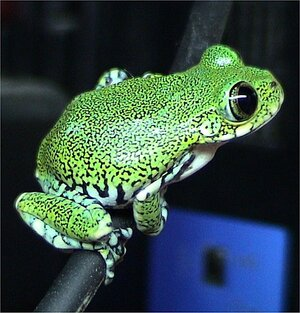

(from [List of Anuran Families](https://en.wikipedia.org/wiki/List_of_Anuran_families))


Now for the fun.  

### Read the frog data

First read about the Anuran data set at [this UCI ML Repository site](https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29).  Then, download `Anuran Calls (MFCCs).zip` from the `Data Folder` page.  Unzip the zip file and you should see the file `Frogs_MFCCs.csv`.

Read this data into python with the following code.

In [124]:
df = pd.read_csv('Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [125]:
X = df.values[:, :22].astype(float)
species = df.values[:, 24].astype(str)
T = np.argmax(species.reshape(-1, 1) == np.unique(species), axis=-1).reshape(-1, 1)
classes = np.unique(T)

In [126]:
X.shape, T.shape

((7195, 22), (7195, 1))

In [127]:
class_names = np.unique(species)
class_names

array(['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata',
       'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
       'LeptodactylusFuscus', 'OsteocephalusOophagus',
       'Rhinellagranulosa', 'ScinaxRuber'], dtype='<U22')

In [128]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Apply `knn` and `confusion_matrix` to frog data

After shuffling the data, take first 80% of samples as train data and remaining 20% as test data.  

Apply `knn` to these partitions using $k=5$ nearest neighbors.

Show the result of calling `confusion_matrix(Ttest, Ytest)` on the results.

Calculate and print the percent of the test data that are correctly classified.

In [129]:
#Shuffle the Data
row_indices = np.arange(X.shape[0])
np.random.shuffle(row_indices)

X = X[row_indices,:]
T = T[row_indices, :]

Xtrain = X[:int(0.8*X.shape[0]), :]
Ttrain = T[:int(0.8*X.shape[0]), :]
Xtest = X[int(0.8*X.shape[0]):, :]
Ttest = T[int(0.8*X.shape[0]):, :]

#Apply Knn,
Ytest = knn(Xtrain, Ttrain, Xtest, 5)

#Return Confusion_Matrix
print(percent_correct(Ttest, Ytest))
confusion_matrix(Ttest, Ytest)

98.0542043085476


,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4,Predicted: 5,Predicted: 6,Predicted: 7,Predicted: 8,Predicted: 9
True: 0,98.529412,0.000000,0.000000,0.735294,0.000000,0.000000,0.000000,0.735294,0.000000,0.000000
True: 1,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
True: 2,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
True: 3,0.000000,4.687500,0.000000,95.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
True: 4,0.000000,0.000000,0.000000,0.000000,97.826087,2.173913,0.000000,0.000000,0.000000,0.000000
True: 5,0.448430,0.896861,0.448430,0.448430,0.448430,95.964126,0.896861,0.448430,0.000000,0.000000
True: 6,0.000000,0.000000,1.587302,1.587302,0.000000,0.000000,96.825397,0.000000,0.000000,0.000000
True: 7,0.000000,0.000000,0.000000,0.000000,18.518519,0.000000,0.000000,77.777778,3.703704,0.000000
True: 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,83.333333,8.333333
True: 9,0.000000,3.030303,0.000000,0.000000,0.000000,0.000000,0.000000,3.030303,0.000000,93.939394


You can have more fun by specifying other `pandas.DataFrame` display styles

### Download, unzip, and import `k_fold_partitions`.

The `stratified_k_fold_partitions` code from lecture is provided for you in file `k_fold_partitions.py`, that you can [download here](https://www.cs.colostate.edu/~anderson/cs345/notebooks/k_fold_partitions.zip) and unzip the downloaded file.

In [130]:
import k_fold_partitions as kfp  

Use `kfp.stratified_k_fold_partitions` to make 5 different train/test partitions with `shuffle=True` and apply `knn` to each using 3 nearest neighbors.  Collect the percent accuracies on test data for each partition, then print the mean of these accuracies.

In [131]:
accuracies = []
for Xtrain, Ttrain, Xtest, Ttest in kfp.stratified_k_fold_partitions(X, T, k=5, shuffle=True):
    Ytest = knn(Xtrain, Ttrain, Xtest, k=3)
    accuracies.append(np.mean(Ytest == Ttest) * 100)
    
print(f'Mean accuracy over folds is {np.mean(accuracies):.2f}')

Mean accuracy over folds is 98.36



Copy the code you just wrote, and paste it into the following code cell.  Then, surround it with a for loop that varies the $k$, the number of nearest neighbors used in the call to `knn`, and vary $k$ from 1 to 100 in steps of 5, using, for example, code like `range(1, 102, 5)`.  At the end of your partitions for loop, append to a results list a list consisting of the value of $k$ (nearest neighbors) and the mean accuracy obtained over the partitions.  

In [132]:
results = []
for k in range(1,100,5):
    accuracies = []
    for Xtrain, Ttrain, Xtest, Ttest in kfp.stratified_k_fold_partitions(X, T, k=5, shuffle=True):
        Ytest = knn(Xtrain, Ttrain, Xtest, k=3)
        accuracies.append(np.mean(Ytest == Ttest) * 100)
    mean_accuracy = np.mean(accuracies)
    results.append([k, mean_accuracy])
for k, mean_accuracy in results:
    print(f'k = {k} and the mean accuracy is {mean_accuracy:.2f}')

k = 1 and the mean accuracy is 98.35
k = 6 and the mean accuracy is 98.43
k = 11 and the mean accuracy is 98.40
k = 16 and the mean accuracy is 98.37
k = 21 and the mean accuracy is 98.49
k = 26 and the mean accuracy is 98.48
k = 31 and the mean accuracy is 98.46
k = 36 and the mean accuracy is 98.54
k = 41 and the mean accuracy is 98.42
k = 46 and the mean accuracy is 98.43
k = 51 and the mean accuracy is 98.46
k = 56 and the mean accuracy is 98.37
k = 61 and the mean accuracy is 98.39
k = 66 and the mean accuracy is 98.39
k = 71 and the mean accuracy is 98.35
k = 76 and the mean accuracy is 98.46
k = 81 and the mean accuracy is 98.50
k = 86 and the mean accuracy is 98.33
k = 91 and the mean accuracy is 98.42
k = 96 and the mean accuracy is 98.37


Now plot your results.  The x-axis should be the value of $k$ (nearest neighbors) and the y-axis is the mean accuracy over partitions for each $k$ (nearest neighbors).

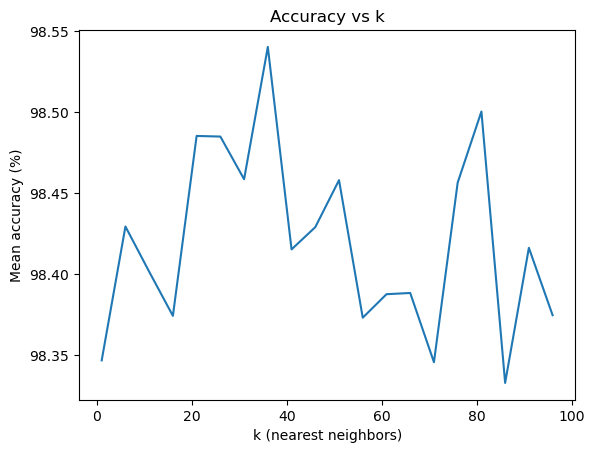

In [133]:
#Extract Values
k_values = [result[0] for result in results]
mean_accuracies = [result[1] for result in results]

# Plot the results
plt.plot(k_values, mean_accuracies)
plt.xlabel('k (nearest neighbors)')
plt.ylabel('Mean accuracy (%)')
plt.title('Accuracy vs k')
plt.show()

##  <font color="red">**10 points**</font>: Discussion Requirements  

**Does k-nearest-neighbors do a good job of classifying frogs into species?**

I would say so I get the correct frog species on average 98% of the time when running with neighbors going from 0-100*

**Which species does it classify the best and for which species does it make the most errors?**

Based on the confusion matrix we generating the model is classifying the species ScinaxRuber the best and AdenomeraAndre the worst.

**Here is what I observe about the graph of accuracy versus $k$ nearest neighbors.**

From the graph I generated above I can see that as we increase in k ther is a slight upward trend in the data however it mostly hovers around 98% if we were to continue running the model for say 1,000,000 nearest neighbors then I believe the model would get a higher percentage of species identified correctly.